# 1. EDA

In [1]:
#Im using tensorflow and keras optimizations provided by intel as described here:
#https://towardsdatascience.com/optimize-your-cpu-for-deep-learning-424a199d7a87
!conda activate intel


Intel(R) MPI Library 2019 Update 6 for Windows* Target Build Environment for Intel(R) 64 applications
Copyright 2007-2019 Intel Corporation.



In [2]:
import time
start_time = time.time()

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set(style = 'white', context = 'notebook', palette = 'deep')
import matplotlib.pyplot as plt

Loading & previewing data set

In [4]:
train_csv = pd.read_csv(r'D:\Desktop\Python projects\bengaliai-cv19\train.csv')
test_csv = pd.read_csv(r'D:\Desktop\Python projects\bengaliai-cv19\test.csv')
classmap_csv = pd.read_csv(r'D:\Desktop\Python projects\bengaliai-cv19\class_map.csv')

In [5]:
train_csv.head()

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
0,Train_0,15,9,5,ক্ট্রো
1,Train_1,159,0,0,হ
2,Train_2,22,3,5,খ্রী
3,Train_3,53,2,2,র্টি
4,Train_4,71,9,5,থ্রো


In [6]:
train_csv.shape

(200840, 5)

In [7]:
test_csv.head()

,row_id,image_id,component
0,Test_0_consonant_diacritic,Test_0,consonant_diacritic
1,Test_0_grapheme_root,Test_0,grapheme_root
2,Test_0_vowel_diacritic,Test_0,vowel_diacritic
3,Test_1_consonant_diacritic,Test_1,consonant_diacritic
4,Test_1_grapheme_root,Test_1,grapheme_root


In [8]:
test_csv.shape

(36, 3)

In [9]:
classmap_csv.head()

,component_type,label,component
0,grapheme_root,0,ং
1,grapheme_root,1,ঃ
2,grapheme_root,2,অ
3,grapheme_root,3,আ
4,grapheme_root,4,ই


In [10]:
classmap_csv.shape

(186, 3)

Counting unique elements and element frequencies

In [11]:
print(f'Train: unique grapheme roots: {train_csv.grapheme_root.nunique()}')
print(f'Train: unique vowel diacritics: {train_csv.vowel_diacritic.nunique()}')
print(f'Train: unique consonant diacritics: {train_csv.consonant_diacritic.nunique()}')

print(f'Class map: unique elements: \n{classmap_csv.component_type.value_counts()}')

print(f"Total combinations: {pd.DataFrame(train_csv.groupby(['grapheme_root', 'vowel_diacritic', 'consonant_diacritic'])).shape[0]}")

Train: unique grapheme roots: 168
Train: unique vowel diacritics: 11
Train: unique consonant diacritics: 7
Class map: unique elements: 
grapheme_root          168
vowel_diacritic         11
consonant_diacritic      7
Name: component_type, dtype: int64
Total combinations: 1292


In [12]:
#grapheme roots
print(classmap_csv.loc[classmap_csv['component_type'] == 'grapheme_root','component'].values)

['ং' 'ঃ' 'অ' 'আ' 'ই' 'ঈ' 'উ' 'ঊ' 'ঋ' 'এ' 'ঐ' 'ও' 'ঔ' 'ক' 'ক্ক' 'ক্ট' 'ক্ত'
 'ক্ল' 'ক্ষ' 'ক্ষ্ণ' 'ক্ষ্ম' 'ক্স' 'খ' 'গ' 'গ্ধ' 'গ্ন' 'গ্ব' 'গ্ম' 'গ্ল'
 'ঘ' 'ঘ্ন' 'ঙ' 'ঙ্ক' 'ঙ্ক্ত' 'ঙ্ক্ষ' 'ঙ্খ' 'ঙ্গ' 'ঙ্ঘ' 'চ' 'চ্চ' 'চ্ছ'
 'চ্ছ্ব' 'ছ' 'জ' 'জ্জ' 'জ্জ্ব' 'জ্ঞ' 'জ্ব' 'ঝ' 'ঞ' 'ঞ্চ' 'ঞ্ছ' 'ঞ্জ' 'ট'
 'ট্ট' 'ঠ' 'ড' 'ড্ড' 'ঢ' 'ণ' 'ণ্ট' 'ণ্ঠ' 'ণ্ড' 'ণ্ণ' 'ত' 'ত্ত' 'ত্ত্ব'
 'ত্থ' 'ত্ন' 'ত্ব' 'ত্ম' 'থ' 'দ' 'দ্ঘ' 'দ্দ' 'দ্ধ' 'দ্ব' 'দ্ভ' 'দ্ম' 'ধ'
 'ধ্ব' 'ন' 'ন্জ' 'ন্ট' 'ন্ঠ' 'ন্ড' 'ন্ত' 'ন্ত্ব' 'ন্থ' 'ন্দ' 'ন্দ্ব' 'ন্ধ'
 'ন্ন' 'ন্ব' 'ন্ম' 'ন্স' 'প' 'প্ট' 'প্ত' 'প্ন' 'প্প' 'প্ল' 'প্স' 'ফ' 'ফ্ট'
 'ফ্ফ' 'ফ্ল' 'ব' 'ব্জ' 'ব্দ' 'ব্ধ' 'ব্ব' 'ব্ল' 'ভ' 'ভ্ল' 'ম' 'ম্ন' 'ম্প'
 'ম্ব' 'ম্ভ' 'ম্ম' 'ম্ল' 'য' 'র' 'ল' 'ল্ক' 'ল্গ' 'ল্ট' 'ল্ড' 'ল্প' 'ল্ব'
 'ল্ম' 'ল্ল' 'শ' 'শ্চ' 'শ্ন' 'শ্ব' 'শ্ম' 'শ্ল' 'ষ' 'ষ্ক' 'ষ্ট' 'ষ্ঠ' 'ষ্ণ'
 'ষ্প' 'ষ্ফ' 'ষ্ম' 'স' 'স্ক' 'স্ট' 'স্ত' 'স্থ' 'স্ন' 'স্প' 'স্ফ' 'স্ব'
 'স্ম' 'স্ল' 'স্স' 'হ' 'হ্ন' 'হ্ব' 'হ্ম' 'হ্ল' 'ৎ' 'ড়' 'ঢ়' 'য়']


In [13]:
#top 10 grapheme roots
#since there's a lot of them I want to see which ones are more common
train_top10_roots = train_csv[['grapheme_root', 'grapheme']].groupby(['grapheme_root']).count().sort_values('grapheme', 
                                ascending = False).head(10).reset_index().rename(columns = {'grapheme' : 'count'})
train_top10_roots['pic'] =  classmap_csv.loc[(classmap_csv['component_type'] == 'grapheme_root') 
                            & 
                            (classmap_csv['label'].isin(train_top10_roots['grapheme_root'].values)),   
                            'component'].values
train_top10_roots

,grapheme_root,count,pic
0,72,5736,ক
1,64,5596,গ
2,13,5420,ত
3,107,5321,দ
4,23,5149,প
5,96,4926,ব
6,113,4395,ভ
7,147,4392,ম
8,133,4374,শ
9,115,4015,স


In [14]:
#vowel diacritics
print(classmap_csv.loc[classmap_csv['component_type'] == 'vowel_diacritic','component'].values)

['0' 'া' 'ি' 'ী' 'ু' 'ূ' 'ৃ' 'ে' 'ৈ' 'ো' 'ৌ']


In [15]:
#consinant diacritics
print(classmap_csv.loc[classmap_csv['component_type'] == 'consonant_diacritic','component'].values)

['0' 'ঁ' 'র্' 'র্য' '্য' '্র' '্র্য']


Counting frequencies of most common graphemes. 

In [16]:
#TO DO:
#add option to display values inplace of indexes
def freq_count(dataframe, feature, size = 1):
    '''
    Returns up to 20 most frequent items in data frame, descending order.
    Args:
        dataframe: dataframe 
        feature: column in data frame 
        size: governs width of the plot, increments of 3
    
    '''
    fig = plt.figure(figsize = (size*3,6))
    ax = sns.countplot(train_csv[feature], order = train_csv[feature].value_counts().index[:20])
    ax.set_title(f'Frequency of {feature}')
    for patch in ax.patches:
        ax.text(patch.get_x()+patch.get_width()/2.0, patch.get_height()+30, '{:.2f}'.format(patch.get_height()/len(dataframe)),
               ha = 'center')
    plt.show()

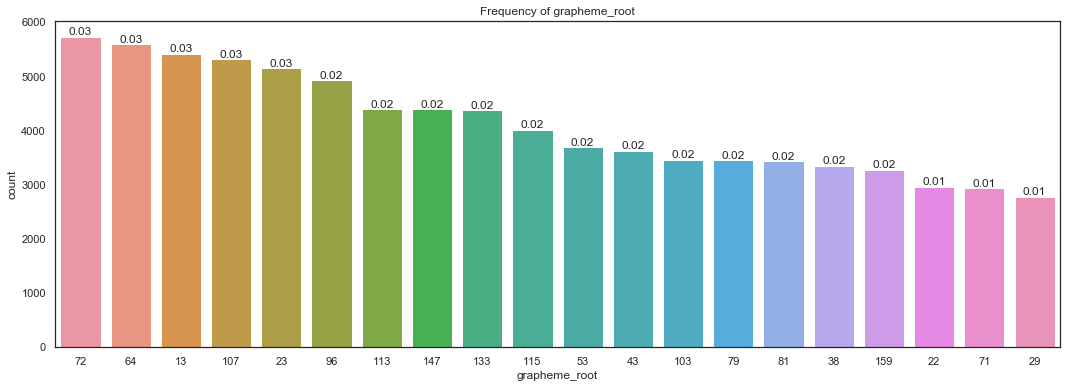

In [17]:
freq_count(train_csv, 'grapheme_root',6)

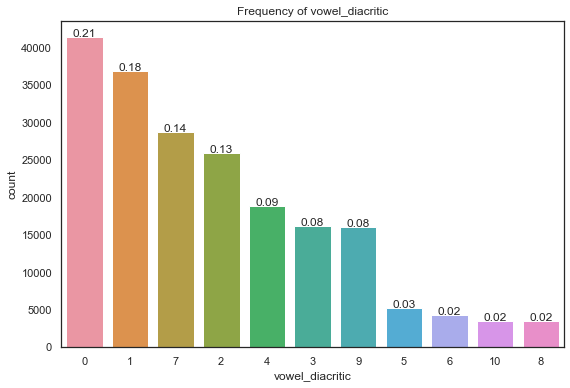

In [18]:
freq_count(train_csv, 'vowel_diacritic',3)

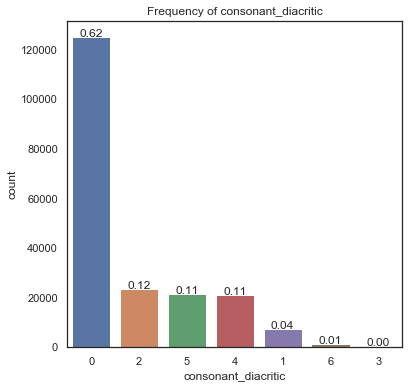

In [19]:
freq_count(train_csv, 'consonant_diacritic',2)

Heatmaps

In [20]:
def plot_count_heatmap(feature1, feature2, df, size=1):  
    '''
    Heatmap showing the distribution of couple of features
    param: feature1 - ex: vowel_diacritic
    param: feature2 - ex: consonant_diacritic
    
    '''
    tmp = df.groupby([feature1, feature2])['grapheme'].count()
    df = tmp.reset_index()
    df
    df_m = df.pivot(feature1, feature2, "grapheme")
    f, ax = plt.subplots(figsize=(9, size * 4))
    sns.heatmap(df_m, annot=True, fmt='3.0f', linewidths=.5, ax=ax)

In [21]:
def show_heatmap(dataframe, feature_1, feature_2, size = 1):
    '''
    Creates heatmap for a given dataframe, 
    {feature_1, feature_2} - columns in dataframe,
    size governs width, increments of 3

    '''
    df = dataframe.groupby([feature_1, feature_2])['grapheme'].count().reset_index().pivot(feature_1, feature_2, 'grapheme')
    fig, ax = plt.subplots(figsize = (12, 3*size))
    sns.heatmap(df, annot = True, fmt = '.0f', cmap = 'coolwarm',)
    ax.margins(1,1)
    plt.show()

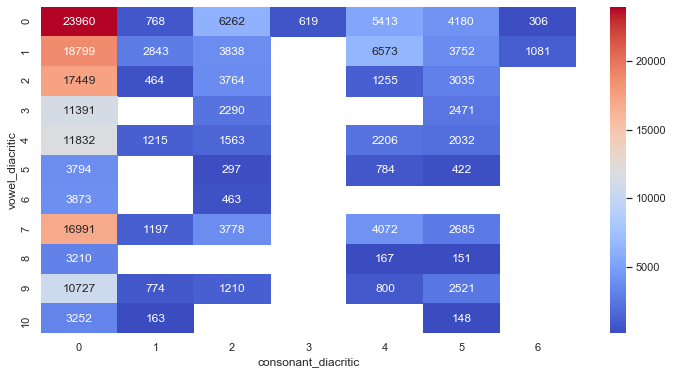

In [22]:
show_heatmap(train_csv, 'vowel_diacritic', 'consonant_diacritic', size = 2)

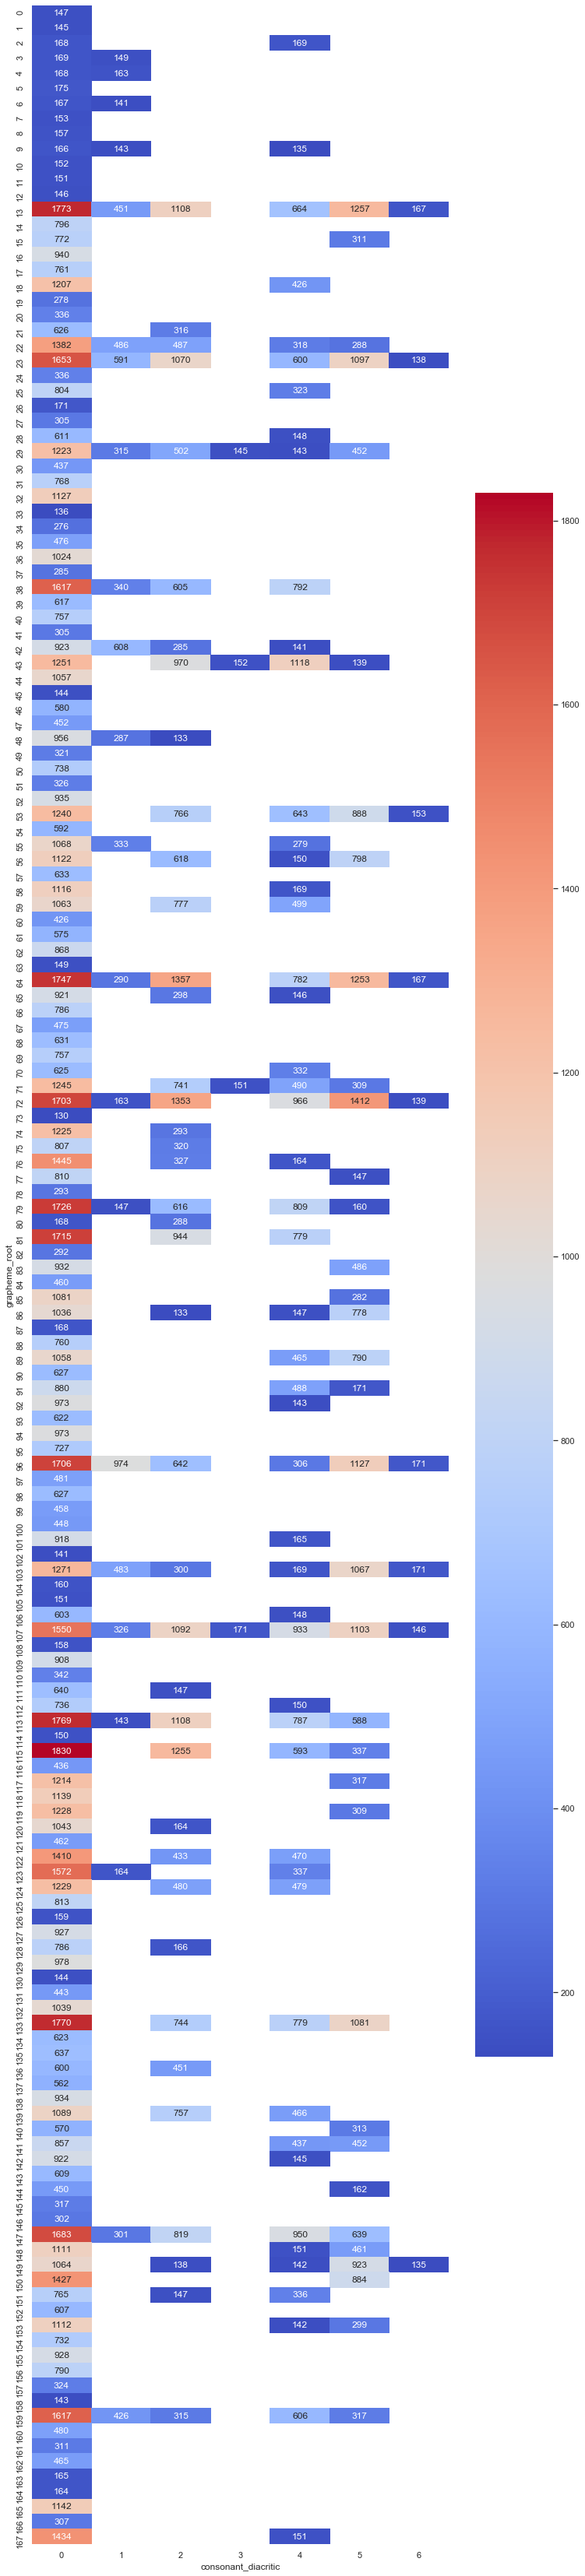

In [23]:
show_heatmap(train_csv, 'grapheme_root', 'consonant_diacritic', size = 20)

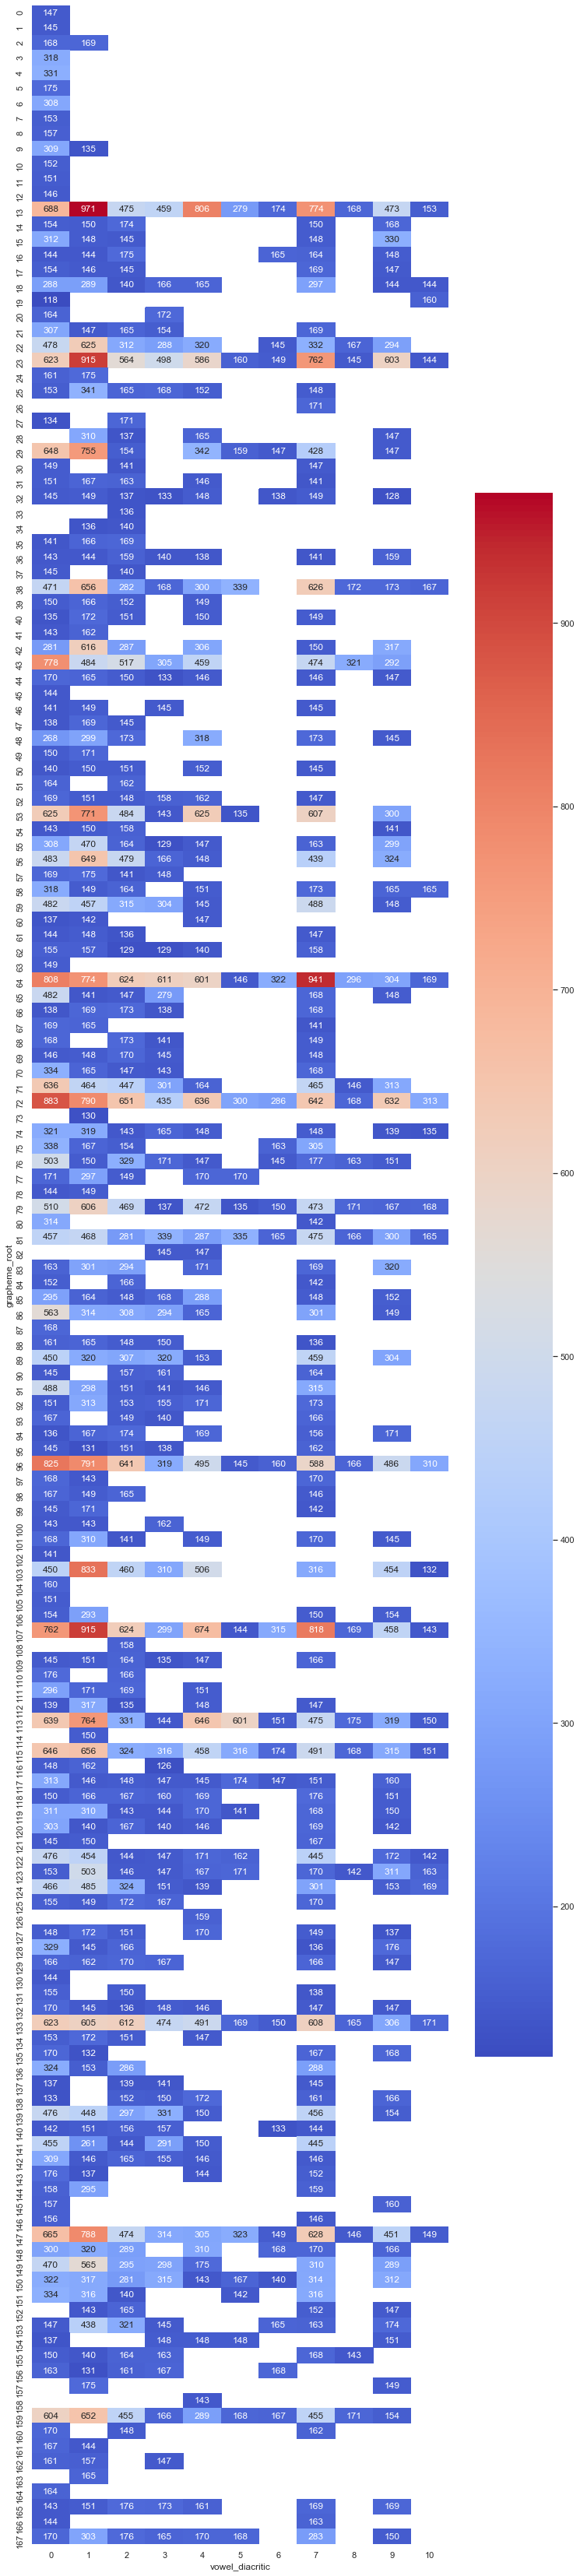

In [24]:
show_heatmap(train_csv, 'grapheme_root', 'vowel_diacritic', size = 20)

Of all possible 168x11x7 combinations only about 10% appear.

In [25]:
#EDA running time
print('EDA done in ', round((time.time()-start_time)/60,1), ' mins')

EDA done in  0.4  mins


# 2. Preparing data

In [26]:
prep_time = time.time()

In [27]:
import cv2
import zipfile
import io
import warnings
import os
from tqdm import tqdm_notebook as tqdm
warnings.filterwarnings("ignore")

Loading entire data set into memory greatly damages performance, 
so I decided to convert data into images. Its about 600 mb.
Next part preprocesses train data.

In [28]:
train = [r'D:\Desktop\Python projects\bengaliai-cv19\train_image_data_0.parquet', 
         r'D:\Desktop\Python projects\bengaliai-cv19\train_image_data_1.parquet', 
         r'D:\Desktop\Python projects\bengaliai-cv19\train_image_data_2.parquet', 
         r'D:\Desktop\Python projects\bengaliai-cv19\train_image_data_3.parquet']

In [29]:
#TO DO:
#inspect borrowed code, reproduce algs

#run 1 time to transform data
HEIGHT = 137
WIDTH = 236
SIZE = 96

def bbox(img):
    rows = np.any(img, axis=1)
    cols = np.any(img, axis=0)
    rmin, rmax = np.where(rows)[0][[0, -1]]
    cmin, cmax = np.where(cols)[0][[0, -1]]
    return rmin, rmax, cmin, cmax

def crop_resize(img0, size=SIZE, pad=16):
    #crop a box around pixels large than the threshold 
    #some images contain line at the sides
    ymin,ymax,xmin,xmax = bbox(img0[5:-5,5:-5] > 80)
    #cropping may cut too much, so we need to add it back
    xmin = xmin - 13 if (xmin > 13) else 0
    ymin = ymin - 10 if (ymin > 10) else 0
    xmax = xmax + 13 if (xmax < WIDTH - 13) else WIDTH
    ymax = ymax + 10 if (ymax < HEIGHT - 10) else HEIGHT
    img = img0[ymin:ymax,xmin:xmax]
    #remove lo intensity pixels as noise
    img[img < 28] = 0
    lx, ly = xmax-xmin,ymax-ymin
    l = max(lx,ly) + pad
    #make sure that the aspect ratio is kept in rescaling
    img = np.pad(img, [((l-ly)//2,), ((l-lx)//2,)], mode='constant')
    return cv2.resize(img,(size,size))
#credits https://www.kaggle.com/iafoss/image-preprocessing-128x128/comments

In [30]:
#run 1 time to transform data

out_train = 'train.zip'

x_tot,x2_tot = [],[]
with zipfile.ZipFile(out_train, 'w') as img_out:
    for fname in train:
        df = pd.read_parquet(fname)
        #the input is inverted
        data = 255 - df.iloc[:, 1:].values.reshape(-1, HEIGHT, WIDTH).astype(np.uint8)
        for idx in tqdm(range(len(df))):
            name = df.iloc[idx,0]
            #normalize each image by its max val
            img = (data[idx]*(255.0/data[idx].max())).astype(np.uint8)
            img = crop_resize(img)
        
            x_tot.append((img/255.0).mean())
            x2_tot.append(((img/255.0)**2).mean()) 
            img = cv2.imencode('.png',img)[1]
            img_out.writestr(name + '.png', img)

In [31]:
try:
    # Create target Directory
    os.mkdir(r'D:\Desktop\Python projects\bengaliai-cv19\train')
    print("Directory Created ") 
    
except FileExistsError:
    print("Directory " , dirName ,  " already exists")

Directory Created 


In [32]:
# Create a ZipFile Object and load sample.zip in it
with zipfile.ZipFile(r'D:\Desktop\Python projects\bengaliai-cv19\train.zip') as zipObj:
# Extract all the contents of zip file in different directory
    zipObj.extractall(r'D:\Desktop\Python projects\bengaliai-cv19\train')

Preprocessing test files for submission.

In [33]:
test =  [r'D:\Desktop\Python projects\bengaliai-cv19\test_image_data_0.parquet', 
         r'D:\Desktop\Python projects\bengaliai-cv19\test_image_data_1.parquet', 
         r'D:\Desktop\Python projects\bengaliai-cv19\test_image_data_2.parquet', 
         r'D:\Desktop\Python projects\bengaliai-cv19\test_image_data_3.parquet']

In [34]:
out_test = 'test.zip'

x_tot,x2_tot = [],[]
with zipfile.ZipFile(out_test, 'w') as img_out:
    for fname in test:
        df = pd.read_parquet(fname)
        #the input is inverted
        data = 255 - df.iloc[:, 1:].values.reshape(-1, HEIGHT, WIDTH).astype(np.uint8)
        for idx in tqdm(range(len(df))):
            name = df.iloc[idx,0]
            #normalize each image by its max val
            img = (data[idx]*(255.0/data[idx].max())).astype(np.uint8)
            img = crop_resize(img)
        
            x_tot.append((img/255.0).mean())
            x2_tot.append(((img/255.0)**2).mean()) 
            img = cv2.imencode('.png',img)[1]
            img_out.writestr(name + '.png', img)

In [35]:
try:
    # Create target Directory
    os.mkdir(r'D:\Desktop\Python projects\bengaliai-cv19\test')
    print("Directory Created ") 
    
except FileExistsError:
    print("Directory " , dirName ,  " already exists")

Directory Created 


In [36]:
# Create a ZipFile Object and load sample.zip in it
with zipfile.ZipFile(r'D:\Desktop\Python projects\bengaliai-cv19\test.zip') as zipObj:
# Extract all the contents of zip file in different directory
    zipObj.extractall(r'D:\Desktop\Python projects\bengaliai-cv19\test')

In [37]:
#total time on data preparation
print('Image preprocessing in ', round((time.time()-prep_time)/60,1), ' mins')

Image preprocessing in  21.4  mins


# 3. Constructing model

In [38]:
model_time = time.time()

In [39]:
import PIL
import itertools

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [41]:
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras import regularizers

Using TensorFlow backend.


In [42]:
#We need to add absolute paths to use {flow_from_dataframe}
#I've relocated data to SSD to improve performance
data_dir = r'D:\Desktop\Python projects\bengaliai-cv19\train'
train_csv['filename'] = train_csv.image_id.apply(lambda filename: data_dir +'\\' + filename + '.png')

In [43]:
#have to coerce columns to string type to use {class_mode = 'sparse'} in generator
train_csv.grapheme_root = train_csv.grapheme_root.astype(str)
train_csv.vowel_diacritic = train_csv.vowel_diacritic.astype(str)
train_csv.consonant_diacritic = train_csv.consonant_diacritic.astype(str)

In [44]:
BATCH_SIZE = 32
IMAGE_SIZE=(96,96)
IMAGE_SIZE_MODEL = (96,96,1)

#generator for grapheme root
train_datagen_multi_output = ImageDataGenerator(shear_range=0.15,
                                   zoom_range=0.15,
                                   rescale = (1.0/255.0),
                                   validation_split=0.2) # set validation split
                                   
train_generator_multi_output = train_datagen_multi_output.flow_from_dataframe(
    train_csv,
    class_mode='multi_output',
    x_col='filename', 
    y_col=['grapheme_root','vowel_diacritic','consonant_diacritic'],
    target_size = IMAGE_SIZE,
    shuffle=True,
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    subset='training') # set as training data

validation_generator_multi_output = train_datagen_multi_output.flow_from_dataframe(
    train_csv,
    class_mode='multi_output',
    x_col='filename', 
    y_col=['grapheme_root','vowel_diacritic','consonant_diacritic'],
    target_size = IMAGE_SIZE,
    shuffle=False,
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    subset='validation') # set as validation data

Found 160672 validated image filenames.
Found 40168 validated image filenames.


In [45]:
# This returns a tensor
inputs = Input(shape=(96,96,1), name= 'inputs')

#block 1
conv_1 = Conv2D(filters = 64, kernel_size = (9,9), strides = 2, activation ='relu')(inputs)
max_pool_1 = MaxPool2D(pool_size=(2, 2))(conv_1)
conv_reduce_1 = Conv2D(filters = 40, kernel_size = (1,1), activation ='relu')(max_pool_1)
dropout_1 = Dropout(rate=0.25)(conv_reduce_1)

#block 2
conv_2 = Conv2D(filters = 64, kernel_size = (3,3), activation ='relu')(dropout_1)
conv_3 = Conv2D(filters = 80, kernel_size = (3,3), activation ='relu')(conv_2)
max_pool_2 = MaxPool2D(pool_size=(2, 2))(conv_3)
conv_reduce_2 = Conv2D(filters = 64, kernel_size = (1,1), activation ='relu')(max_pool_2)

#block 3
conv_4 = Conv2D(filters = 96, kernel_size = (3,3), activation ='relu')(conv_reduce_2)
conv_5 = Conv2D(filters = 128, kernel_size = (3,3), activation ='relu')(conv_4)
conv_reduce_3 = Conv2D(filters = 80, kernel_size = (1,1), activation ='relu')(conv_5)

#block 4 final
conv_6 = Conv2D(filters = 192, kernel_size = (3,3), activation ='relu')(conv_reduce_3)
conv_7 = Conv2D(filters = 384, kernel_size = (3,3), activation ='relu')(conv_6)
normalize = BatchNormalization()(conv_7)
flatten = Flatten()(normalize)
dropout_2 = Dropout(rate=0.25)(flatten)
predictions_root = Dense(168, activation='softmax', name = 'predictions_root')(dropout_2)
predictions_vowel = Dense(11, activation='softmax', name = 'predictions_vowel')(dropout_2)
predictions_cons = Dense(7, activation='softmax', name = 'predictions_cons')(dropout_2)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.









In [46]:
optimizer = optimizers.Adamax()

In [47]:
model = Model(inputs = inputs, outputs = [predictions_root, predictions_vowel,predictions_cons])

In [48]:
model.compile(optimizer = optimizer,
              loss = {'predictions_root': 'sparse_categorical_crossentropy',
                      'predictions_vowel': 'sparse_categorical_crossentropy', 
                      'predictions_cons': 'sparse_categorical_crossentropy'},
              loss_weights = {'predictions_root': 1.,
                              'predictions_vowel': 0.5,
                              'predictions_cons': 0.5}, 
              metrics = {'predictions_root': 'accuracy',
                         'predictions_vowel': 'accuracy',
                         'predictions_cons': 'accuracy'})


In [49]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             (None, 96, 96, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 44, 44, 64)   5248        inputs[0][0]                     
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 22, 22, 64)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 22, 22, 40)   2600        max_pooling2d_1[0][0]            
__________________________________________________________________________________________________
dropout_1 

In [50]:
# And trained it via:
#difference in epochs time is mainly due to other workload on my notebook
epochs = 20
data_downsize = 1
history = model.fit_generator(train_generator_multi_output, 
                    steps_per_epoch=len(train_generator_multi_output)//data_downsize, 
                    epochs=epochs, verbose=1, callbacks=None, 
                    validation_data=validation_generator_multi_output, 
                    validation_steps=len(validation_generator_multi_output)//data_downsize, 
                    max_queue_size=100, shuffle=True, 
                    workers = 2, initial_epoch=0)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
5021/5021 [==============================] - 2408s 480ms/step - loss: 2.9231 - predictions_root_loss: 2.3269 - predictions_vowel_loss: 0.6419 - predictions_cons_loss: 0.5505 - predictions_root_acc: 0.4254 - predictions_vowel_acc: 0.7814 - predictions_cons_acc: 0.8100 - val_loss: 1.3314 - val_predictions_root_loss: 1.0373 - val_predictions_vowel_loss: 0.3220 - val_predictions_cons_loss: 0.2662 - val_predictions_root_acc: 0.6984 - val_predictions_vowel_acc: 0.8954 - val_predictions_cons_acc: 0.9143
Epoch 2/20
5021/5021 [==============================] - 2289s 456ms/step - loss: 1.1745 - predictions_root_loss: 0.8745 - predictions_vowel_loss: 0.3238 - predictions_cons_loss: 0.2762 - predictions_root_acc: 0.7524 - predictions_vowel_acc: 0.8962 - predictions_cons_acc: 0.9111 - val_loss: 0.8465 - val_predictions_root_loss: 0.6302 - val_predictions_vowel_loss: 0.2337 - val_predictions_co

Epoch 16/20
5021/5021 [==============================] - 1842s 367ms/step - loss: 0.3232 - predictions_root_loss: 0.2226 - predictions_vowel_loss: 0.1020 - predictions_cons_loss: 0.0992 - predictions_root_acc: 0.9323 - predictions_vowel_acc: 0.9706 - predictions_cons_acc: 0.9700 - val_loss: 0.4312 - val_predictions_root_loss: 0.3196 - val_predictions_vowel_loss: 0.1116 - val_predictions_cons_loss: 0.1116 - val_predictions_root_acc: 0.9144 - val_predictions_vowel_acc: 0.9696 - val_predictions_cons_acc: 0.9676
Epoch 17/20
5021/5021 [==============================] - 1854s 369ms/step - loss: 0.3187 - predictions_root_loss: 0.2186 - predictions_vowel_loss: 0.1019 - predictions_cons_loss: 0.0984 - predictions_root_acc: 0.9330 - predictions_vowel_acc: 0.9706 - predictions_cons_acc: 0.9696 - val_loss: 0.4365 - val_predictions_root_loss: 0.3215 - val_predictions_vowel_loss: 0.1161 - val_predictions_cons_loss: 0.1138 - val_predictions_root_acc: 0.9133 - val_predictions_vowel_acc: 0.9691 - val_p

In [51]:
#total time on data preparation
print('Model training in ', round((time.time()-model_time)/60,1), ' mins')

Model training in  649.1  mins


# 4. Predictions

In [52]:
from keras.preprocessing import image

In [53]:
data_dir = r'D:\Desktop\Python projects\bengaliai-cv19\test'

In [54]:
#generator for test images
test_datagen = ImageDataGenerator(rescale = (1.0/255.0)) 
test_generator = test_datagen.flow_from_directory(data_dir, 
                                target_size=IMAGE_SIZE, 
                                color_mode='grayscale', 
                                class_mode=None, 
                                batch_size=1)

Found 0 images belonging to 0 classes.


In [55]:
def get_submission(data_dir):
    df = pd.DataFrame(columns=['row_id','target'])
    for img in os.listdir(data_dir):
        row_id_base = str(os.path.splitext(img)[0])
        img = os.path.join(data_dir, img)
        img = image.load_img(img, target_size=IMAGE_SIZE, grayscale=True)
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        predictions = model.predict(img)
        predictions_to_classes = [0,0,0]
        #multi_class outputs array of arrays, outer represents number of classes and each inner is one-hot vector
        for i in range(3):
            for j in predictions[i][0]:
                if j == 0:
                    predictions_to_classes[i] += 1
                else:
                    break
        df = df.append({'row_id': row_id_base+'_grapheme_root','target':predictions_to_classes[0]},ignore_index=True)
        df = df.append({'row_id': row_id_base+'_vowel_diacritic','target':predictions_to_classes[1]},ignore_index=True)                 
        df = df.append({'row_id': row_id_base+'_consonant_diacritic','target':predictions_to_classes[2]},ignore_index=True)
    return df

In [56]:
submission = get_submission(data_dir)

In [57]:
submission.to_csv('submission.csv', index=False)

In [58]:
#Getting total runtime
print('Notebook done in ', round((time.time()-start_time)/60,1), ' mins')
#since that's more than target 9h, i'll also try less (40 or 32) filters for conv_1 layer

Notebook done in  670.9  mins
